In [1]:
#First analyzing word frequencies

In [1]:
import pandas as pd
%matplotlib inline

In [9]:
df_CNN_sentiment = pd.read_csv("cnn_sentiment.csv")
df_FOX_sentiment = pd.read_csv("foxnews_sentiment.csv")

In [21]:
df_CNN_sentiment = df_CNN_sentiment.drop(0)

In [25]:
df_FOX_sentiment = df_FOX_sentiment.drop(0)

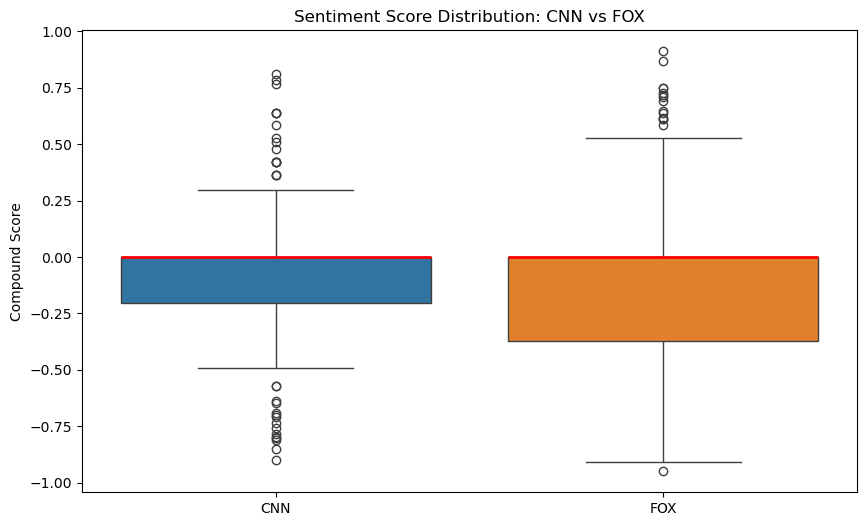

In [35]:
plt.figure(figsize=(10, 6))
sentiment_data = pd.concat([
    df_CNN_sentiment['compound'].rename('CNN'),
    df_FOX_sentiment['compound'].rename('FOX')
], axis=1)

# Add medianprops to make median line more visible
sns.boxplot(data=sentiment_data, medianprops=dict(color="red", linewidth=2))
plt.title('Sentiment Score Distribution: CNN vs FOX')
plt.ylabel('Compound Score')
plt.show()

In [53]:
#Next, analyzing word frequencies. 
df_CNN_word_frequency = pd.read_csv("CNN_word_frequencies.csv")
df_FOX_word_frequency = pd.read_csv("FOX_word_frequencies.csv")

In [57]:
df_FOX_word_frequency.head()

,word,count
0,harris,18
1,new,12
2,trump,9
3,hurricane,8
4,october,8


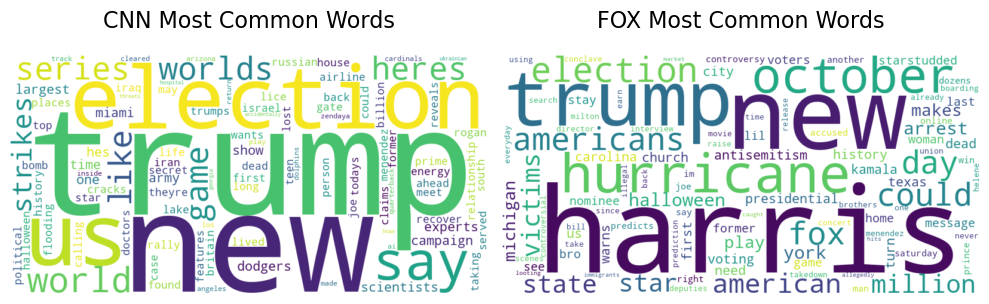

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Create dictionary from dataframes
cnn_dict = dict(zip(df_CNN_word_frequency['word'], df_CNN_word_frequency['count']))
fox_dict = dict(zip(df_FOX_word_frequency['word'], df_FOX_word_frequency['count']))

# Generate word clouds
wc_cnn = WordCloud(width=800, height=400, 
                  background_color='white',
                  max_words=100).generate_from_frequencies(cnn_dict)

wc_fox = WordCloud(width=800, height=400, 
                  background_color='white',
                  max_words=100).generate_from_frequencies(fox_dict)

# Plot CNN word cloud
ax1.imshow(wc_cnn, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('CNN Most Common Words', fontsize=16, pad=20)

# Plot FOX word cloud
ax2.imshow(wc_fox, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('FOX Most Common Words', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

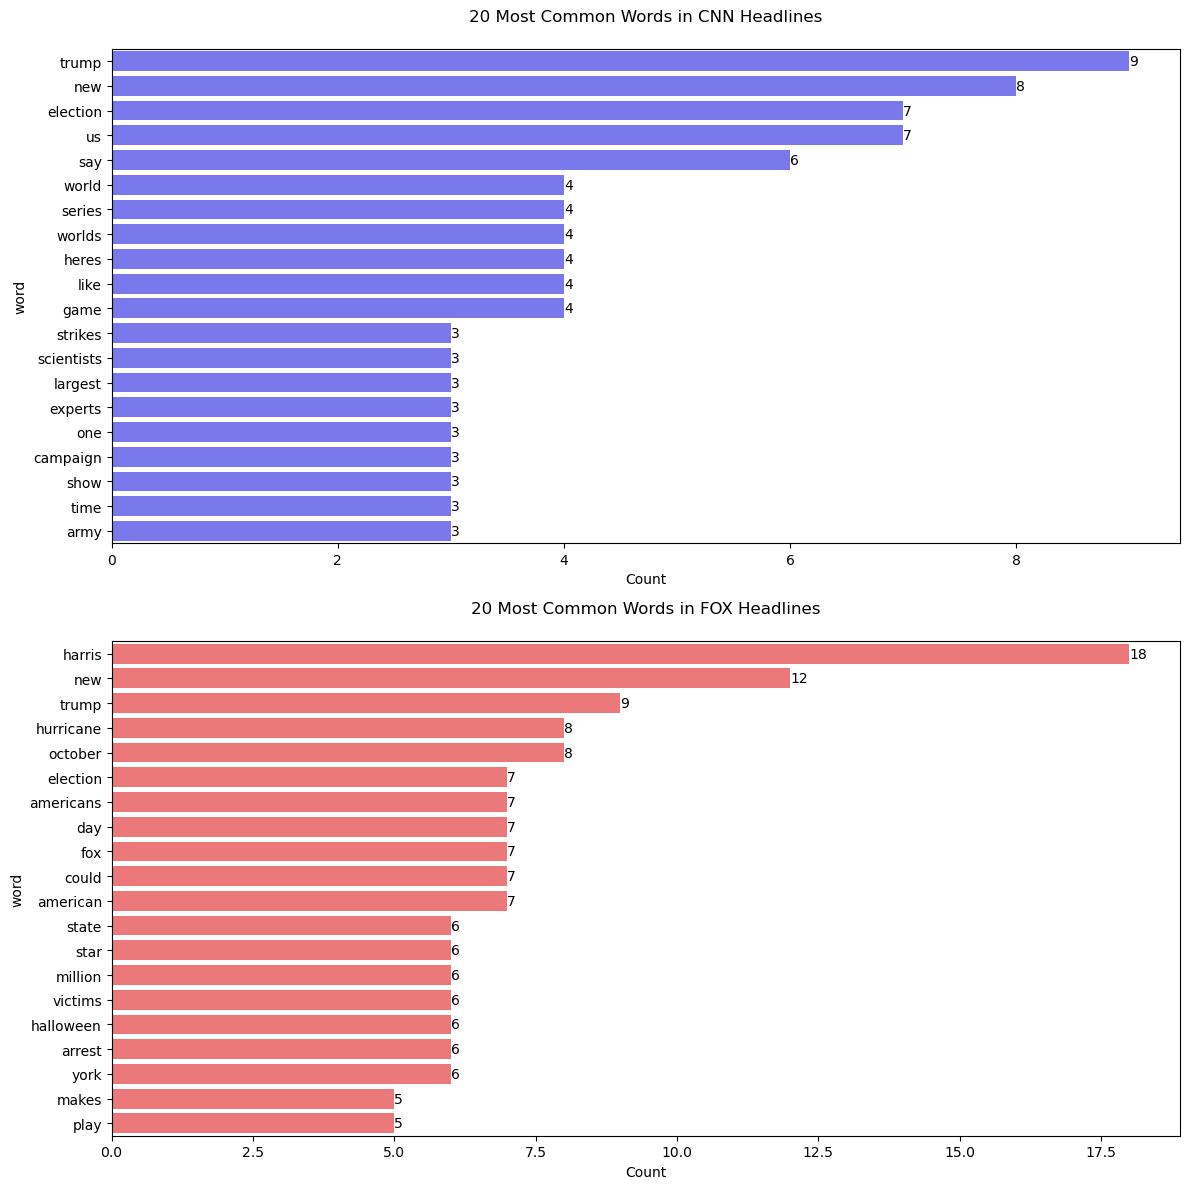

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get top 20 words from each dataset
cnn_top20 = df_CNN_word_frequency.nlargest(20, 'count')
fox_top20 = df_FOX_word_frequency.nlargest(20, 'count')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# CNN plot
sns.barplot(data=cnn_top20, y='word', x='count', ax=ax1, color='blue', alpha=0.6)
ax1.set_title('20 Most Common Words in CNN Headlines', pad=20)
ax1.set_xlabel('Count')

# FOX plot
sns.barplot(data=fox_top20, y='word', x='count', ax=ax2, color='red', alpha=0.6)
ax2.set_title('20 Most Common Words in FOX Headlines', pad=20)
ax2.set_xlabel('Count')

# Add count numbers at the end of each bar
for ax in [ax1, ax2]:
    for i in ax.containers:
        ax.bar_label(i)

plt.tight_layout()
plt.show()

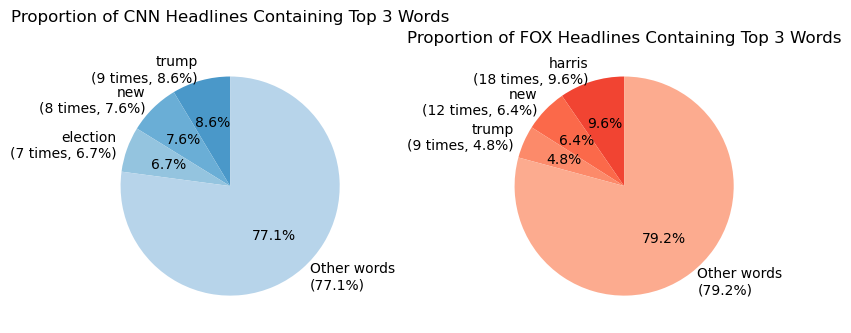

CNN Statistics:
Total headlines: 105
'trump' appears in 9 headlines (8.6%)
'new' appears in 8 headlines (7.6%)
'election' appears in 7 headlines (6.7%)

FOX Statistics:
Total headlines: 187
'harris' appears in 18 headlines (9.6%)
'new' appears in 12 headlines (6.4%)
'trump' appears in 9 headlines (4.8%)


In [93]:
# Get total number of headlines (length of original datasets)
total_cnn_headlines = len(df_CNN_sentiment)  # assuming this is your original headline dataset
total_fox_headlines = len(df_FOX_sentiment)

# Get top 3 words and their counts
cnn_top3 = df_CNN_word_frequency.nlargest(3, 'count')
fox_top3 = df_FOX_word_frequency.nlargest(3, 'count')

# Calculate percentages
cnn_percentages = (cnn_top3['count'] / total_cnn_headlines * 100).round(1)
fox_percentages = (fox_top3['count'] / total_fox_headlines * 100).round(1)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))

# CNN Pie Chart
cnn_labels = [f"{word}\n({count} times, {pct}%)" 
              for word, count, pct in zip(cnn_top3['word'], cnn_top3['count'], cnn_percentages)]
cnn_others = 100 - sum(cnn_percentages)
cnn_sizes = list(cnn_percentages) + [cnn_others]
cnn_labels.append(f'Other words\n({cnn_others:.1f}%)')

ax1.pie(cnn_sizes, labels=cnn_labels, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Blues(np.linspace(0.6, 0.3, len(cnn_sizes))))
ax1.set_title('Proportion of CNN Headlines Containing Top 3 Words', pad=20)

# FOX Pie Chart
fox_labels = [f"{word}\n({count} times, {pct}%)" 
              for word, count, pct in zip(fox_top3['word'], fox_top3['count'], fox_percentages)]
fox_others = 100 - sum(fox_percentages)
fox_sizes = list(fox_percentages) + [fox_others]
fox_labels.append(f'Other words\n({fox_others:.1f}%)')

ax2.pie(fox_sizes, labels=fox_labels, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Reds(np.linspace(0.6, 0.3, len(fox_sizes))))
ax2.set_title('Proportion of FOX Headlines Containing Top 3 Words', pad=5)

plt.tight_layout()
plt.show()

# Print the exact numbers
print("CNN Statistics:")
print(f"Total headlines: {total_cnn_headlines}")
for word, count, pct in zip(cnn_top3['word'], cnn_top3['count'], cnn_percentages):
    print(f"'{word}' appears in {count} headlines ({pct}%)")

print("\nFOX Statistics:")
print(f"Total headlines: {total_fox_headlines}")
for word, count, pct in zip(fox_top3['word'], fox_top3['count'], fox_percentages):
    print(f"'{word}' appears in {count} headlines ({pct}%)")